# Importamos librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Carga de datos MNIST

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train[0].shape

len(x_train)

60000

# Visualizacion de una Imagen

5

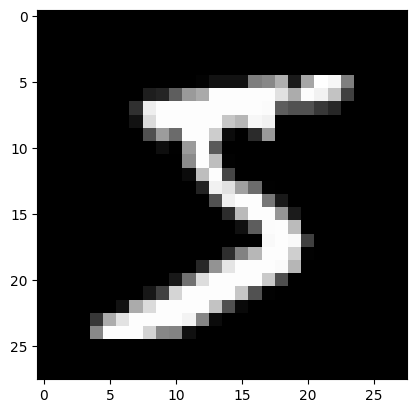

In [5]:
plt.imshow(x_train[0], cmap = 'gray',  vmin=0, vmax=255)
y_train[0]

# Normalización de los datos de entrada

In [7]:
x_train = x_train / 255
x_test = x_test / 255
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

# Aplanamiento de las imágenes

In [8]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)
x_train_flatten.shape 
x_train_flatten[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

# Definimos el modelo de la red neuronal

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid' )
])

# Compilación, Entrenamiento y Evaluacion del Modelo

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy'),
model.fit(x_train_flatten, y_train, epochs=5)

model.evaluate(x_test_flatten, y_test)

Epoch 1/5
1875/1875 [==============================] - 1s 649us/step - loss: 2.1873 - accuracy: 0.5822
Epoch 2/5
1875/1875 [==============================] - 1s 641us/step - loss: 1.9760 - accuracy: 0.7087
Epoch 3/5
1875/1875 [==============================] - 1s 648us/step - loss: 1.7896 - accuracy: 0.7382
Epoch 4/5
1875/1875 [==============================] - 1s 641us/step - loss: 1.6261 - accuracy: 0.7598
Epoch 5/5
313/313 [==============================] - 0s 590us/step - loss: 1.4034 - accuracy: 0.8002


[1.4034308195114136, 0.8001999855041504]

# Predecir etiquetas de datos de prueba como numeros enteros y calcular la matriz de confusion

In [11]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 [==============================] - 0s 523us/step


# Mostrar la matriz de confusion en un mapa de calor

Text(95.72222222222221, 0.5, 'Truth')

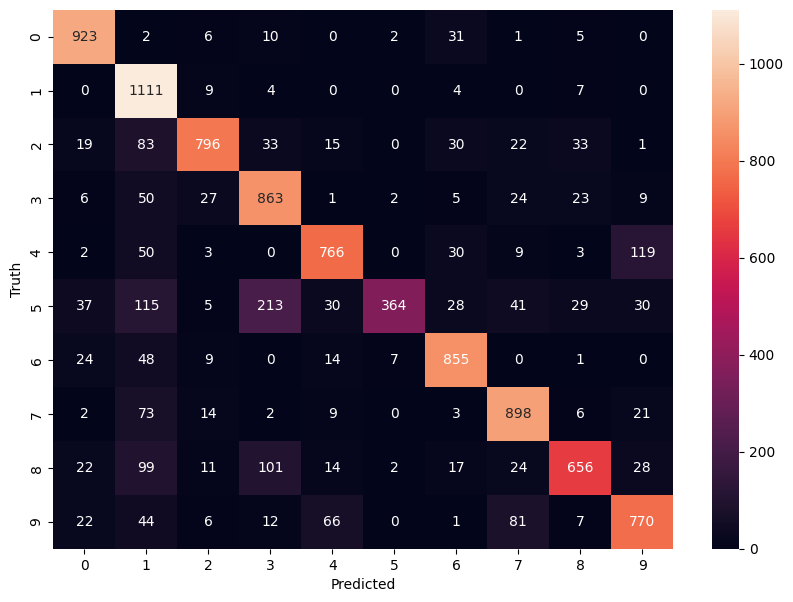

In [12]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Imprimir imagen de ejemplo

y_test: 7


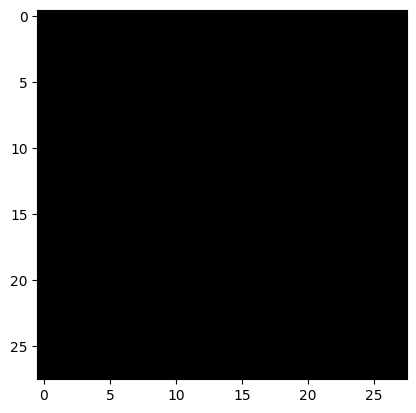

In [13]:
plt.imshow(x_test[80], cmap='gray', vmin=0, vmax=1)
print(f'y_test: {y_test[80]}')

# Predecir y comparar la imagen de ejemplo con la etiqueta real

In [14]:
y_predicted = model.predict(x_test_flatten)
np.argmax(y_predicted[80])
print(y_test[80] == np.argmax(y_predicted[80]))
print(y_test[80])

313/313 [==============================] - 0s 515us/step
False
7


# Creación de otro modelo con mas capas ocultas

In [15]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')  #100 capas ocultas y 10 de salidas.
])

# Compilación, Entrenamiento y Evaluación del Modelo

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)
model.evaluate(x_test_flatten,y_test)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2485 - accuracy: 0.7140
Epoch 2/5
1875/1875 [==============================] - 2s 938us/step - loss: 0.5271 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 2s 950us/step - loss: 0.4049 - accuracy: 0.8901
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3572 - accuracy: 0.8996
Epoch 5/5
313/313 [==============================] - 0s 690us/step - loss: 0.3128 - accuracy: 0.9112


[0.3128363788127899, 0.9111999869346619]

# Predecir etiquetas de datos de prueba como numeros enteros y calcular la matriz de confusion

In [17]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 [==============================] - 0s 622us/step
